## Markov Chain Monte Carlo Simulation of the Ising Model with the Metropolis-Hasting's Algorithm

In [1]:
#libraries for mc
import numpy as np
import scipy 
import matplotlib.pyplot as plt

#libraries for gif generation - must pip install moviepy 
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

#libraries for interactive simulations - must conda install pillow
from PIL import Image
from ipywidgets import interact

%matplotlib inline


## 1) 1-D Ising Model Simulation: Ferromagnetic coupling with no external magnetic field                                                            
  ##                              (Single example with fixed temperature)

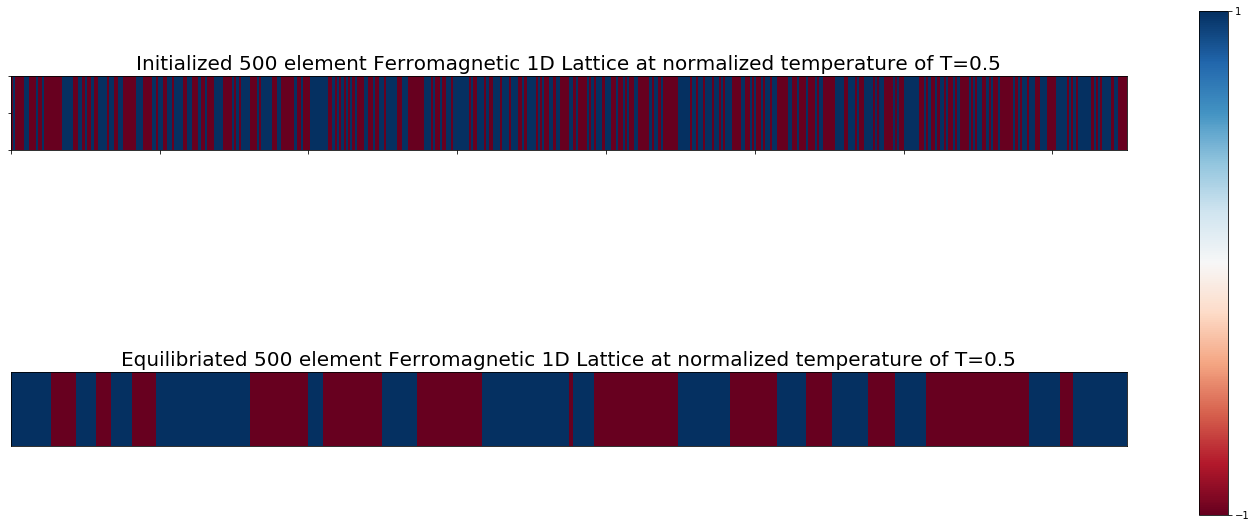

			Average energy over evolution of the system: -0.896
			Average magnetization: 0.00948


In [2]:
J = 1 #coupling parameter
steps = 7000 #number of monte carlo steps
grid_size = 500 #lattice size
grid = np.random.choice([-1,1], size = grid_size) #initialize lattice

def H(array):  #function to compute hamiltonian / energy of the lattice
    e =-np.sum(J * array * np.roll(array, 1) + J * array * np.roll(array, -1)) / 2
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)

def delta_E(array, x): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2 * J * (array[x] * array[(x - 1) % grid_size] + array[x] * array[(x + 1) % grid_size])

def acceptance_probability(array, x, T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array, x)) / T)

def monte_carlo(array, T): #monte carlo step with metropolis-hastings algorithm
    index = np.random.randint(grid_size) #pick a random spin site
    random = np.random.rand() #generate random number for acceptance test
    if delta_E(array, index) < 0: # flip spin and accept new configuration if change in energy is negative
        array[index] *= -1
    elif random < acceptance_probability(array, index, T): #or accept with probability in accordance with acceptance criterion
        array[index] *=- 1
    return array

def image_convert(array):
    image_xvalues = [] #manipulate 1-D array into an equivalent 2-D array to display as image (stretch along x and y axis)
    for element in array:
        for n in range(30):
            image_xvalues.append(element)
    converted = np.array([image_xvalues] * 1000)
    return converted

initial_image = image_convert(grid)

E = 0
Mag = 0
for i in range(steps): #run monte carlo process till equilibriation
    monte_carlo(grid, 0.5)

for j in range(2000): #run monte carlo process for 2000 iterations after equilibriation to calculate average parameters
    eq = monte_carlo(grid, 0.5)
    E += H(eq)
    Mag += M(eq)

H_average = E / (2000 * grid_size) #average energy per site over the evolution of the system
M_average = Mag / (2000 * grid_size) #average magnetization per site over the evolution of the system (order parameter)

eq_image = image_convert(eq)

fig = plt.figure(figsize = (20,10)) #display stuff. Every 'band' in the image is a spin site.
ax = fig.add_subplot(212) 
ax2 = fig.add_subplot(211)
cax = ax.imshow(eq_image, cmap = plt.cm.RdBu)
cax2 = ax2.imshow(initial_image, cmap = plt.cm.RdBu) 
ax.set_title('Equilibriated 500 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5', size = 20)
ax2.set_title('Initialized 500 element Ferromagnetic 1D Lattice at normalized temperature of T=0.5', size = 20)
plt.setp(ax.get_yticklabels(), visible = False)
plt.setp(ax.get_xticklabels(), visible = False) 
plt.setp(ax2.get_yticklabels(), visible = False)
plt.setp(ax2.get_xticklabels(), visible = False)
ax.tick_params(bottom = False, left = False)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
fig.colorbar(cax, cax = cbar_ax, ticks = [-1,1])
plt.show()

print('\t\t\tAverage energy over evolution of the system: {}'.format(H_average))
print('\t\t\tAverage magnetization: {}'.format(M_average))

## 1b) Simulating system evolution of 1-D Ising model (fixed temp) [gif generation]

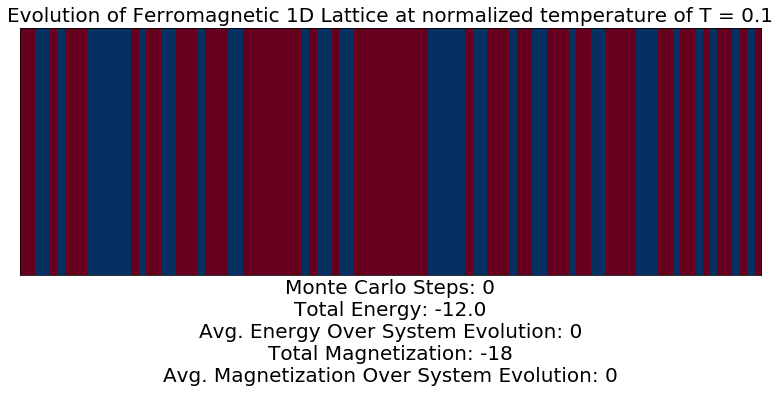


[MoviePy] Building file 1d MC lattice simultion (fixed temp, T = 0.1, duration = 5, fps = 10, multiplier = 10, MC steps = 500, grid size = 100).gif with imageio


 98%|█████████████████████████████████████████████████ | 50/51 [02:11<00:04,  4.66s/it]


In [3]:
#adapted from http://zulko.github.io/blog/2014/11/29/data-animations-with-python-and-moviepy/

### warning - this uses a lot of memory, to ensure no crashes occur only  ###
### render gifs in jupyter that don't involve a lot of frames or mc steps ###
### for longer renders copy the code onto your machine and run it locally ###

#set parameters for gif render
T = 0.1 #set temp
J = 1 #set coupling parameter
grid_size = 100 #set 1-D lattice size
duration = 5 #set gif duration (seconds)
fps = 10 #set gif fps
multiplier = 10 #number of mc steps that are run per frame (must be a whole number >= 1)

### the multiplier can greatly reduce rendering time! ###
### total number of MC steps = gif_duration * gif_fps * multiplier ###

#Initialize lattice and calculate energy and magnetization
grid = np.random.choice([-1,1], size = grid_size) #initialize lattice
initial_image = image_convert(grid) #convert initial lattice to 2d image to use in imshow
Energy = H(grid) #total energy of system
Magnetization = M(grid) #total magnetization of system

#Initialize counters - don't alter these values
E = 0 #counter for energy evolution
Mag = 0 #counter for magnetization evolution
counter = 0 #counter for mc steps

#plot initial frame
fig = plt.figure(figsize=(20,10)) #set figure size
ax = fig.add_subplot(211) #setup subplot positioning
ax.set_title('Evolution of Ferromagnetic 1D Lattice at normalized temperature of T = {}'.format(T),size=20)
ax.set_xlabel('Monte Carlo Steps: {}\nTotal Energy: {}\nAvg. Energy Over System Evolution: {}\nTotal Magnetization: {}\nAvg. Magnetization Over System Evolution: {}'.format(counter,Energy,E,Magnetization,Mag),size=20) #I am using the x-label to display information about the system
cax = ax.imshow(initial_image, cmap = plt.cm.RdBu)
plt.setp(ax.get_yticklabels(), visible = False)
plt.setp(ax.get_xticklabels(), visible = False)   
ax.tick_params(bottom = False, left = False)
#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7]) #uncomment for colorbar
#fig.colorbar(cax, cax = cbar_ax,ticks=[-1,1]) #uncomment for colorbar
plt.show()


def make_frame_mpl(t): #moviepy function that takes a snapshot of the figure, updates it and takes another snapshot and so on
    
    #Queue every programmers nightmare
    #Thankfully we are in a physics class so if it works it works.
    global T
    global E
    global Mag 
    global cax
    global grid
    global counter
    global H_average
    global M_average
    global multiplier
    
    #apply MC step(s) and update grid
    for i in range(multiplier):
        #update grid
        grid = monte_carlo(grid,T)
    
        #update counters, total magnetization and energy
        counter += 1
        E += H(grid)
        Mag += M(grid)
        Energy = H(grid)
        Magnetization = M(grid)
        H_average = E/(counter*grid_size) #average energy per site over the evolution of the system
        M_average = Mag/(counter*grid_size) #average magnetization per site over the evolution of the system (order parameter)

    #update figure and labels
    cax = ax.imshow(image_convert(grid), cmap = plt.cm.RdBu) #update figure
    ax.set_xlabel('Monte Carlo Steps: {}'.format(counter),size=20)
    #\nTotal Energy: {}\nAvg. Energy Over System Evolution: {}\nTotal Magnetization: {}\nAvg. Magnetization Over System Evolution: {} ,Energy,E,Magnetization,Mag
    
    return mplfig_to_npimage(fig) # create RGB image of figure

#write animation to file as a gif
animation = mpy.VideoClip(make_frame_mpl, duration = duration)
animation.write_gif("1d MC lattice simultion (fixed temp, T = {}, duration = {}, fps = {}, multiplier = {}, MC steps = {}, grid size = {}).gif".format(T, duration, fps, multiplier, duration * fps * multiplier, grid_size), fps = fps) #change this title if you don't want it to overwrite previously rendered gifs

## 1c) Interactive simulation of 1-D Ising system evolution 

In [4]:
#adapted from http://jakevdp.github.io/blog/2017/12/11/live-coding-cython-ising-model/

#set parameters for interactive render
T = 0.1 #set temp
J = 1 #set coupling parameter
grid_size = 100 #set 1-D lattice size
number_frames = 100 #set number of frames in interactive render
multiplier = 5 #number of mc steps that are run per frame (must be a whole number >= 1)

#Initialize lattice and compute first frame
grid = np.random.choice([-1,1], size = grid_size) #initialize lattice
initial_image = image_convert(grid) #convert initial lattice to 2d image to use as first frame

#calculate frames to be displayed
frames = [initial_image]
for i in range(number_frames):
    for j in range(multiplier):
        grid = monte_carlo(grid, T) #apply MC step, [multiplier] times, and update grid
    frames.append(image_convert(grid))
    
#function that takes a 2d array and displays a b&w image (+1 spin = white pixel, -1 spin = black pixel)
def barcode_generator_9000(grid):
    converted_grid = 255/2*(grid + 1) #converts grid to values of 0 and 255 (required to use Image.fromarray())
    return Image.fromarray(np.uint8(converted_grid))

def display(frame = (0, len(frames) - 1)):
    return barcode_generator_9000(frames[frame])

interact(display)
plt.show()

A Jupyter Widget

## 1d) Meshing a) b) and c)

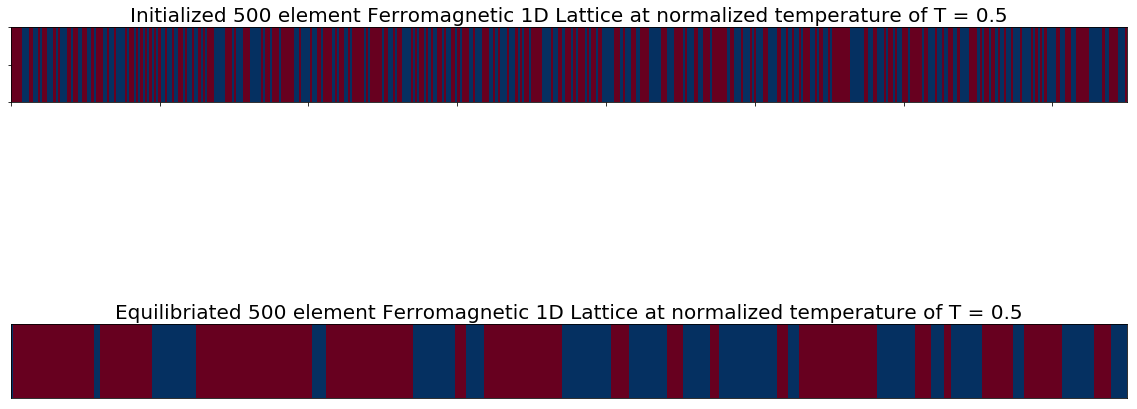

			Average energy over evolution of the system: -0.869464
			Average magnetization: -0.188882


A Jupyter Widget

In [8]:
J = 1 #coupling parameter
steps = 7000 #number of monte carlo steps
grid_size = 500 #lattice size
grid = np.random.choice([-1,1], size = grid_size) #initialize lattice

multiplier = 1000 #set multiplier (number of MC steps per frame in interactive simulation)
### multiplier must be a common divisor of steps and of 2000 (or whatever number is used) ###

def H(array):  #function to compute hamiltonian / energy of the lattice
    e =-np.sum(J * array * np.roll(array, 1) + J * array * np.roll(array, -1)) / 2
    return e

def M(array): #function to calculate magnetization of the lattice
    return np.sum(array)

def delta_E(array, x): #change in energy caused by single spin switch (only nearest neighbour interactions)
    return 2 * J * (array[x] * array[(x - 1) % grid_size] + array[x] * array[(x + 1) % grid_size])

def acceptance_probability(array, x, T): #acceptance ratio (symmetric proposal distribution on markov chain)
    return np.exp(-(delta_E(array, x)) / T)

def monte_carlo(array, T): #monte carlo step with metropolis-hastings algorithm
    index = np.random.randint(grid_size) #pick a random spin site
    random = np.random.rand() #generate random number for acceptance test
    if delta_E(array, index) < 0: # flip spin and accept new configuration if change in energy is negative
        array[index] *= -1
    elif random < acceptance_probability(array, index, T): #or accept with probability in accordance with acceptance criterion
        array[index] *=- 1
    return array

def image_convert(array):
    image_xvalues = [] #manipulate 1-D array into an equivalent 2-D array to display as image (stretch along x and y axis)
    for element in array:
        for n in range(30):
            image_xvalues.append(element)
    converted = np.array([image_xvalues] * 1000)
    return converted

initial_image = image_convert(grid)

#initialize list of frames for interactive simulation
frames = [initial_image]

E = 0
Mag = 0
for i in range(int(steps / multiplier)): #run monte carlo process till equilibriation
    for j in range(multiplier):
        monte_carlo(grid, 0.5)
    frames.append(image_convert(grid))

for j in range(int(2000 / multiplier)): #run monte carlo process for 2000 iterations after equilibriation to calculate average parameters
    for j in range(multiplier):
        eq = monte_carlo(grid, 0.5)
        E += H(eq)
        Mag += M(eq)
    frames.append(image_convert(grid))

H_average = E / (2000 * grid_size) #average energy per site over the evolution of the system
M_average = Mag / (2000 * grid_size) #average magnetization per site over the evolution of the system (order parameter)

eq_image = image_convert(eq)

fig = plt.figure(figsize = (20,10)) #display stuff. Every 'band' in the image is a spin site.
ax = fig.add_subplot(212) 
ax2 = fig.add_subplot(211)
cax = ax.imshow(eq_image, cmap = plt.cm.RdBu)
cax2 = ax2.imshow(initial_image, cmap = plt.cm.RdBu) 
ax.set_title('Equilibriated 500 element Ferromagnetic 1D Lattice at normalized temperature of T = 0.5', size = 20)
ax2.set_title('Initialized 500 element Ferromagnetic 1D Lattice at normalized temperature of T = 0.5', size = 20)
plt.setp(ax.get_yticklabels(), visible = False)
plt.setp(ax.get_xticklabels(), visible = False) 
plt.setp(ax2.get_yticklabels(), visible = False)
plt.setp(ax2.get_xticklabels(), visible = False)
ax.tick_params(bottom = False, left = False)
#cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7]) #uncomment for colorbar
#fig.colorbar(cax, cax = cbar_ax, ticks = [-1,1]) #uncomment for colorbar
plt.show()

print('\t\t\tAverage energy over evolution of the system: {}'.format(H_average))
print('\t\t\tAverage magnetization: {}'.format(M_average))



#function that takes a 2d array and displays a b&w image (+1 spin = white pixel, -1 spin = black pixel)
def barcode_generator_9000(grid):
    converted_grid = 255/2*(grid + 1) #converts grid to values of 0 and 255 (required to use Image.fromarray())
    return Image.fromarray(np.uint8(converted_grid))

def display(frame = (0, len(frames) - 1)):
    return barcode_generator_9000(frames[frame])

interact(display)
plt.show()

## 2) Temperature dependent evolution of the 1-D Ising Model

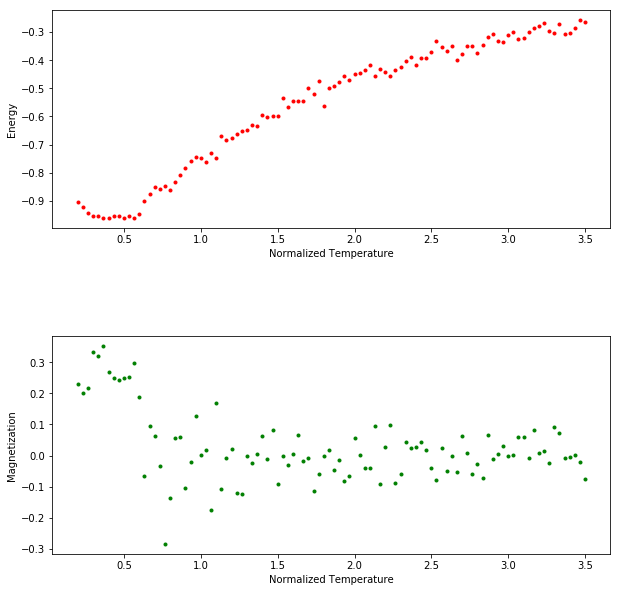

No distinct second order phase transition in magnetization for 1-D Lattice.


In [4]:
temps=np.linspace(0.2,3.5,100) #generate an array of various normalized temperatures

E_array=[] #to store average energies and magnetizations at various temperatures
M_array=[]

for temp in temps: #iterate over temperatures
    E=0
    Mag=0
    for i in range(steps): #run monte carlo process till equilibriation
        monte_carlo(grid,temp)
        
    for j in range(2000): #run monte carlo process for 2000 iterations after equilibriation to calculate average parameters
        eq=monte_carlo(grid,temp)
        E+=H(eq)
        Mag+=M(eq)
    E_array.append(E/(2000*grid_size)) #store parameters
    M_array.append(Mag/(2000*grid_size))


fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10)) #display stuff
plt.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Normalized Temperature')
ax1.set_ylabel('Energy')
ax1.plot(temps,E_array,'r.')
ax2.set_xlabel('Normalized Temperature')
ax2.set_ylabel('Magnetization')
ax2.plot(temps,M_array,'g.')
plt.show()

print('No distinct second order phase transition in magnetization for 1-D Lattice.')

    